Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


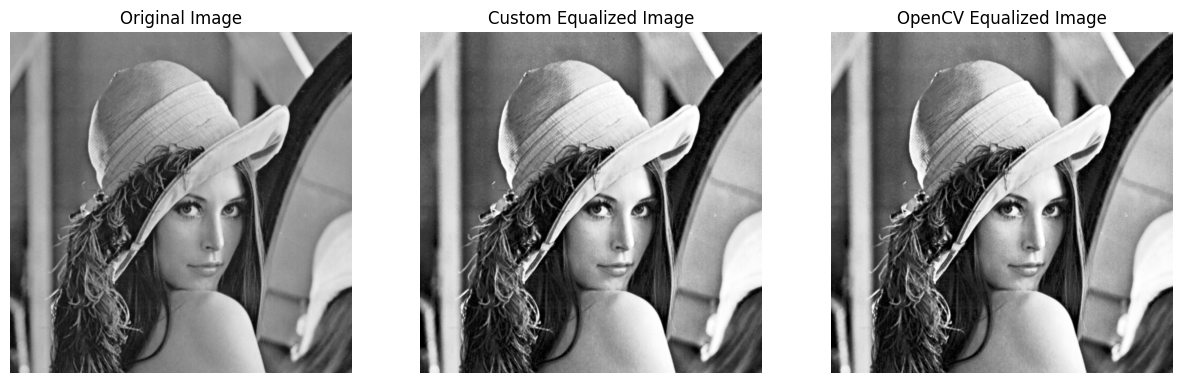

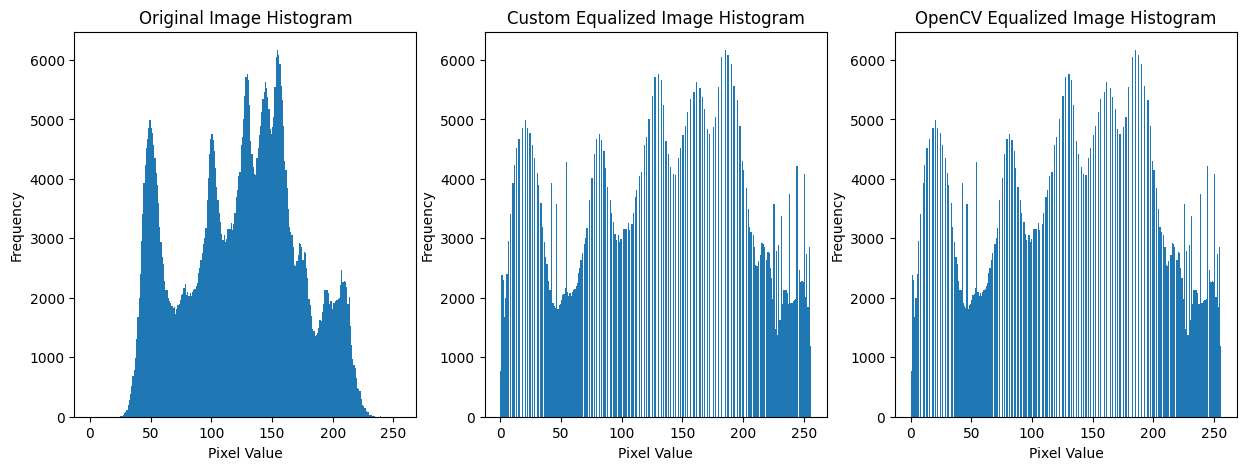

Images saved successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Step 1: Calculate histogram
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0,256])

    # Step 2: Calculate cumulative sum of histogram
    cdf = hist.cumsum()

    # Step 3: Compute transformation and do rounding
    L = 256
    transformation = ((L - 1) / (image.size)) * cdf
    transformation = np.round(transformation).astype(np.uint8)

    # Step 4: Generate transferred image
    equalized_image = transformation[image]

    return equalized_image

# Read the image
image_path = '/content/drive/My Drive/ColabNotebooks/HistogramEQu/LenaImage.JPG'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image_custom = histogram_equalization(image)
equalized_image_opencv = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image_custom, cmap='gray')
plt.title('Custom Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(equalized_image_opencv, cmap='gray')
plt.title('OpenCV Equalized Image')
plt.axis('off')

plt.show()

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(equalized_image_custom.ravel(), 256, [0, 256])
plt.title('Custom Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(equalized_image_opencv.ravel(), 256, [0, 256])
plt.title('OpenCV Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()
# Save the images to Google Drive
cv2.imwrite('/content/drive/My Drive/ColabNotebooks/HistogramEQu/custom_equalized_image.jpg', equalized_image_custom)
cv2.imwrite('/content/drive/My Drive/ColabNotebooks/HistogramEQu/opencv_equalized_image.jpg', equalized_image_opencv)

print("Images saved successfully.")



